In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

df = pd.read_csv('./data/data.csv')

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [3]:

df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [4]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
numerical_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']

df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


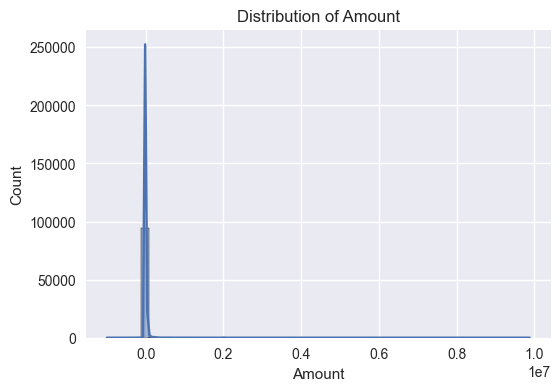

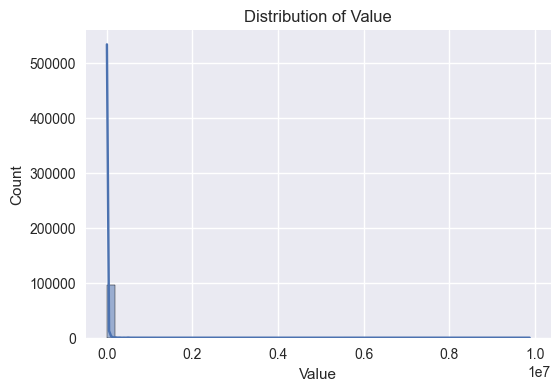

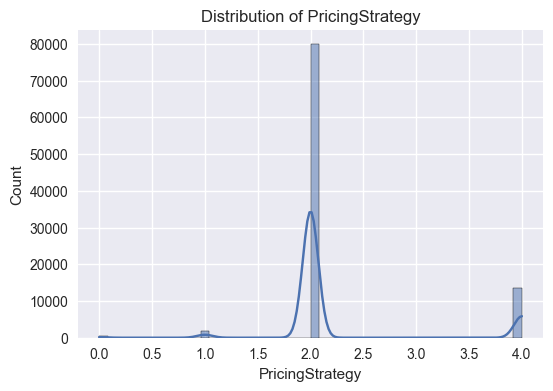

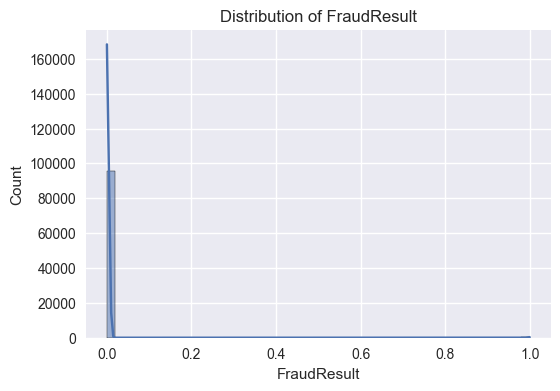

In [5]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


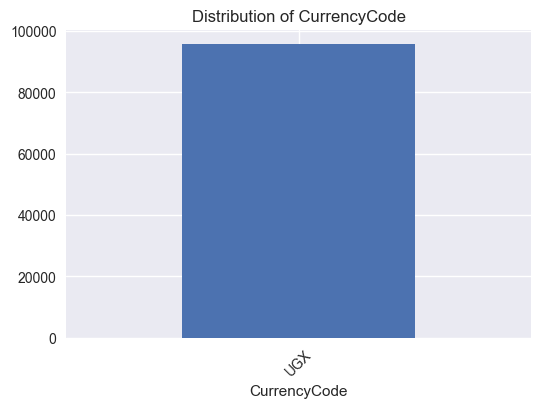

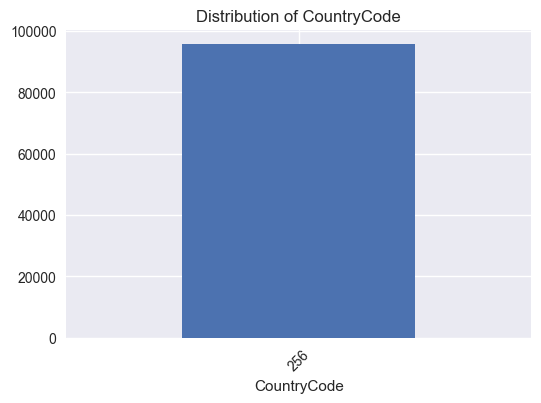

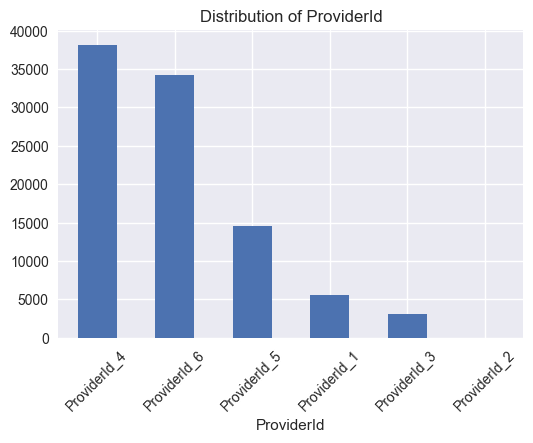

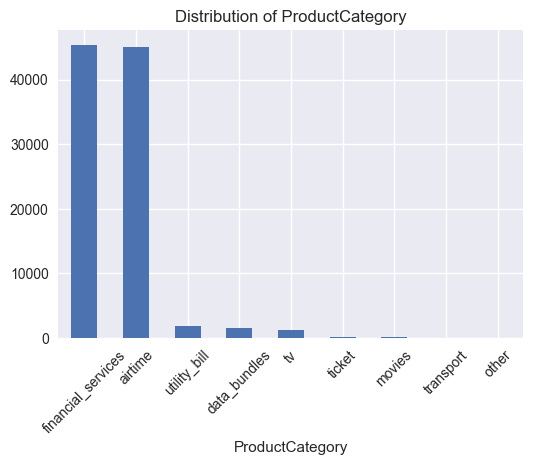

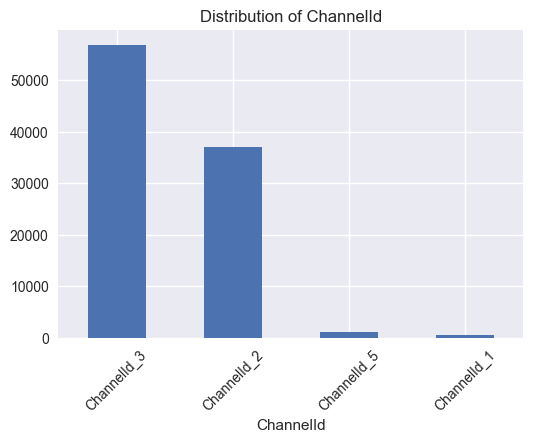

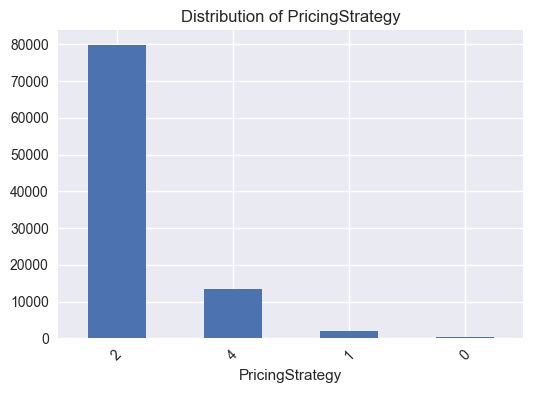

In [6]:
categorical_cols = [
    'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory',
    'ChannelId', 'PricingStrategy'
]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


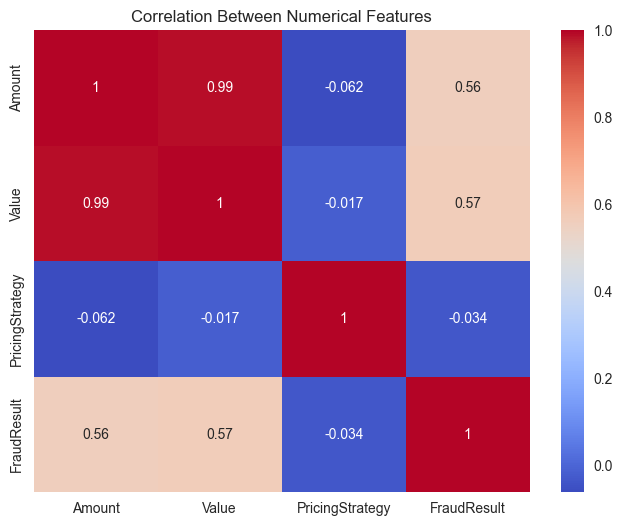

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Between Numerical Features')
plt.show()


In [8]:
missing = df.isnull().sum()

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_percentage': (missing / len(df)) * 100
})

missing_df[missing_df.missing_count > 0]


,missing_count,missing_percentage


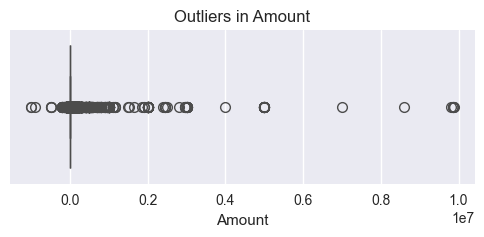

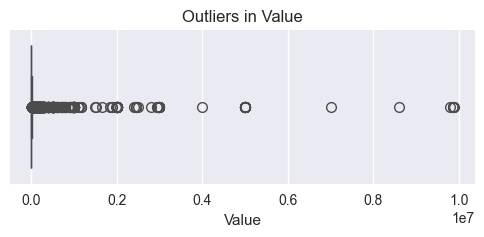

In [9]:
for col in ['Amount', 'Value']:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


In [10]:
snapshot_date = df['TransactionStartTime'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (snapshot_date - x.max()).days,
    'TransactionId': 'count',
    'Value': 'sum'
}).reset_index()

rfm.columns = ['CustomerId', 'Recency', 'Frequency', 'Monetary']

rfm.describe()


,Recency,Frequency,Monetary
count,3742.000000,3742.000000,3.742000e+03
mean,31.461251,25.564404,2.531025e+05
std,27.118932,96.929602,2.715877e+06
min,1.000000,1.000000,5.000000e+01
25%,6.000000,2.000000,6.500000e+03
50%,25.000000,7.000000,3.200000e+04
75%,54.000000,20.000000,1.020600e+05
max,91.000000,4091.000000,1.049000e+08
